JAVASCRIPT OBJECT NOTATION
shorter than xml
almost exactly like a python dictionary

syntax diverges from py slightly:
True = true
None = null

json.load()
-- load from a file

json.loads()
-- load from a string - that's the S in loads

json.dump()
-- output the file

json.dumps
-- output the file as a string

In [337]:
import json
import pandas as pd
from pandas.io.json import json_normalize #package for flattening json in pandas df

import matplotlib as plt
%matplotlib inline


In [410]:
# IMPORTS FOR PLOTLY

# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [ ]:
# TIME STAMP THE DOWNLOAD OF THE JSON DATA so you can compare them

In [338]:
json_file = open ("/Users/aidanairuser/Desktop/pet_0523_04022019.json", "r", encoding = "utf-8")

In [339]:
pet = json.load (json_file)

In [340]:
json_file.close()

In [341]:
pet

{'links': {'self': 'https://petition.parliament.uk/petitions/235821.json'},
 'data': {'type': 'petition',
  'id': 235821,
  'attributes': {'action': 'Offer the Republic of Ireland full UK membership so they can rejoin the Union.',
   'background': 'The RoI left our Union in 1922 after 121 years of being part of the family. We should now ask them to reconsider their position within both the UK & EU as a way of solving the current impasse over the Irish border issue that is holding up the Withdrawal Agreement. Britain & Ireland stronger together',
   'additional_details': '',
   'state': 'open',
   'signature_count': 1807,
   'created_at': '2018-12-21T15:15:33.380Z',
   'updated_at': '2019-02-04T04:20:15.072Z',
   'rejected_at': None,
   'opened_at': '2019-01-09T10:43:41.649Z',
   'closed_at': None,
   'moderation_threshold_reached_at': '2018-12-21T15:36:52.455Z',
   'response_threshold_reached_at': None,
   'government_response_at': None,
   'debate_threshold_reached_at': None,
   'sche

In [342]:
type (pet)

# so since it's a dictionary you access the info by key....

dict

In [343]:
# the main top level branch is 'data'

pet["data"]

{'type': 'petition',
 'id': 235821,
 'attributes': {'action': 'Offer the Republic of Ireland full UK membership so they can rejoin the Union.',
  'background': 'The RoI left our Union in 1922 after 121 years of being part of the family. We should now ask them to reconsider their position within both the UK & EU as a way of solving the current impasse over the Irish border issue that is holding up the Withdrawal Agreement. Britain & Ireland stronger together',
  'additional_details': '',
  'state': 'open',
  'signature_count': 1807,
  'created_at': '2018-12-21T15:15:33.380Z',
  'updated_at': '2019-02-04T04:20:15.072Z',
  'rejected_at': None,
  'opened_at': '2019-01-09T10:43:41.649Z',
  'closed_at': None,
  'moderation_threshold_reached_at': '2018-12-21T15:36:52.455Z',
  'response_threshold_reached_at': None,
  'government_response_at': None,
  'debate_threshold_reached_at': None,
  'scheduled_debate_date': None,
  'debate_outcome_at': None,
  'creator_name': 'Scott Packer',
  'rejection

In [345]:
# the other top level branch (of 2)

pet ["links"]

{'self': 'https://petition.parliament.uk/petitions/235821.json'}

In [346]:
# how does a dictionary work again?

thisdict =	{
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}
x = thisdict["model"]
x

'Mustang'

In [347]:
#pull out part of the PET dictionary: drill down into PET/DATA/ATTRIBUTES to get to 
# SIGNATURES_BY_COUNTRY

sign = pet["data"]['attributes']['signatures_by_country']
sign

[{'name': 'Australia', 'code': 'AU', 'signature_count': 4},
 {'name': 'Canada', 'code': 'CA', 'signature_count': 7},
 {'name': 'Denmark', 'code': 'DK', 'signature_count': 1},
 {'name': 'Gibraltar', 'code': 'GI', 'signature_count': 1},
 {'name': 'Guernsey', 'code': 'GG', 'signature_count': 1},
 {'name': 'Hong Kong', 'code': 'HK', 'signature_count': 1},
 {'name': 'Hungary', 'code': 'HU', 'signature_count': 1},
 {'name': 'Ireland', 'code': 'IE', 'signature_count': 52},
 {'name': 'Isle of Man', 'code': 'IM', 'signature_count': 2},
 {'name': 'New Zealand', 'code': 'NZ', 'signature_count': 4},
 {'name': 'Sri Lanka', 'code': 'LK', 'signature_count': 1},
 {'name': 'Ukraine', 'code': 'UA', 'signature_count': 1},
 {'name': 'United Arab Emirates', 'code': 'AE', 'signature_count': 1},
 {'name': 'United Kingdom', 'code': 'GB', 'signature_count': 1728},
 {'name': 'United States', 'code': 'US', 'signature_count': 2}]

In [348]:
# build a df from this info

sig_df = pd.DataFrame.from_dict(sign)

In [349]:
sig_df.head(4)

,code,name,signature_count
0,AU,Australia,4
1,CA,Canada,7
2,DK,Denmark,1
3,GI,Gibraltar,1


In [357]:
# check the total number of entries against the petition figure - 1807 at 5am on Monday

sig_df.signature_count.sum()

1807

In [361]:
# signatures from 15 countries

sig_df.name.count()

15

In [364]:
sig_df.shape

(15, 3)

In [366]:
sig_df = sig_df[['name', 'signature_count', 'code']]

In [367]:
sig_df.sort_values(by = "signature_count", ascending = False)

,name,signature_count,code
13,United Kingdom,1728,GB
7,Ireland,52,IE
1,Canada,7,CA
0,Australia,4,AU
9,New Zealand,4,NZ
8,Isle of Man,2,IM
14,United States,2,US
2,Denmark,1,DK
3,Gibraltar,1,GI
4,Guernsey,1,GG


In [368]:
sig_df2 = sig_df

In [369]:
sig_df2.set_index("name",drop=True,inplace=True)

In [374]:
# DROP ONE COLUMN 
sig_df2.drop('code', axis=1, inplace=True)


In [375]:
sig_df2.sort_values(by = "signature_count", ascending = False)

,signature_count
name,
United Kingdom,1728
Ireland,52
Canada,7
Australia,4
New Zealand,4
Isle of Man,2
United States,2
Denmark,1
Gibraltar,1


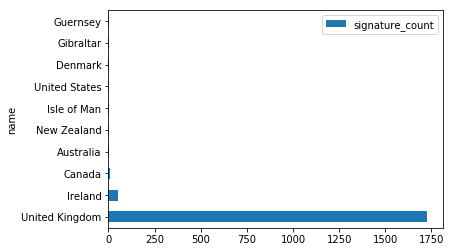

In [373]:
sig_df2.sort_values(by = "signature_count", ascending = False).head(10).plot(kind = 'barh')


In [ ]:
# Resample to monthly frequency and plot 
df2 = df[['view','reads','published_date']].\
         set_index('published_date').\
         resample('M').mean()

df2.iplot(kind='bar', xTitle='Date', yTitle='Average',
    title='Monthly Average Views and Reads')

In [ ]:
# ****** MOVING ONTO CONSTITUENCIES *********

In [376]:
# Drilling down to one top branch (data) then down to attributes then to sigs

const = pet["data"]['attributes']['signatures_by_constituency']
const

[{'name': 'Edinburgh East',
  'ons_code': 'S14000022',
  'mp': 'Tommy Sheppard MP',
  'signature_count': 2},
 {'name': 'Edinburgh North and Leith',
  'ons_code': 'S14000023',
  'mp': 'Deidre Brock MP',
  'signature_count': 1},
 {'name': 'Edinburgh South',
  'ons_code': 'S14000024',
  'mp': 'Ian Murray MP',
  'signature_count': 2},
 {'name': 'Edinburgh South West',
  'ons_code': 'S14000025',
  'mp': 'Joanna Cherry QC MP',
  'signature_count': 4},
 {'name': 'Edinburgh West',
  'ons_code': 'S14000026',
  'mp': 'Christine Jardine MP',
  'signature_count': 2},
 {'name': 'Banff and Buchan',
  'ons_code': 'S14000007',
  'mp': 'David Duguid MP',
  'signature_count': 2},
 {'name': 'Falkirk',
  'ons_code': 'S14000028',
  'mp': 'John McNally MP',
  'signature_count': 2},
 {'name': 'Glasgow Central',
  'ons_code': 'S14000029',
  'mp': 'Alison Thewliss MP',
  'signature_count': 2},
 {'name': 'Glasgow East',
  'ons_code': 'S14000030',
  'mp': 'David Linden MP',
  'signature_count': 3},
 {'name': 'Gl

In [377]:
con_df = pd.DataFrame.from_dict(const)

In [378]:
con_df.sort_values(by = "signature_count", ascending = False)

,mp,name,ons_code,signature_count
57,Gavin Robinson MP,Belfast East,N06000001,26
184,Rt Hon Sammy Wilson MP,East Antrim,N06000005,25
269,Rt Hon Sir Jeffrey M. Donaldson MP,Lagan Valley,N06000009,25
428,Paul Girvan MP,South Antrim,N06000014,20
58,Rt Hon Nigel Dodds MP,Belfast North,N06000002,20
145,Rt Hon Mark Field MP,Cities of London and Westminster,E14000639,18
470,Jim Shannon MP,Strangford,N06000016,17
329,Mickey Brady MP,Newry and Armagh,N06000011,15
336,Lady Hermon MP,North Down,N06000013,15
501,David Simpson MP,Upper Bann,N06000017,15


In [379]:
con_df = con_df[['name', 'signature_count', 'ons_code', 'mp']]

In [382]:
con_df

,name,signature_count,ons_code,mp
0,Edinburgh East,2,S14000022,Tommy Sheppard MP
1,Edinburgh North and Leith,1,S14000023,Deidre Brock MP
2,Edinburgh South,2,S14000024,Ian Murray MP
3,Edinburgh South West,4,S14000025,Joanna Cherry QC MP
4,Edinburgh West,2,S14000026,Christine Jardine MP
5,Banff and Buchan,2,S14000007,David Duguid MP
6,Falkirk,2,S14000028,John McNally MP
7,Glasgow Central,2,S14000029,Alison Thewliss MP
8,Glasgow East,3,S14000030,David Linden MP
9,Glasgow North,2,S14000031,Patrick Grady MP


In [387]:
con_df.name.count()

# that's out of 650 constituencies

568

In [400]:
con_df.signature_count.value_counts().sort_index(ascending = False)


26      1
25      2
20      2
18      1
17      1
15      3
14      1
13      2
12      1
11      1
10      4
9       1
8       3
7       7
6       8
5      33
4      69
3     121
2     160
1     147
Name: signature_count, dtype: int64

In [403]:
con_df.signature_count.value_counts().head()

2    160
1    147
3    121
4     69
5     33
Name: signature_count, dtype: int64

In [380]:
con_df.sort_values(by = "signature_count", ascending = False).head(10)

,name,signature_count,ons_code,mp
57,Belfast East,26,N06000001,Gavin Robinson MP
184,East Antrim,25,N06000005,Rt Hon Sammy Wilson MP
269,Lagan Valley,25,N06000009,Rt Hon Sir Jeffrey M. Donaldson MP
428,South Antrim,20,N06000014,Paul Girvan MP
58,Belfast North,20,N06000002,Rt Hon Nigel Dodds MP
145,Cities of London and Westminster,18,E14000639,Rt Hon Mark Field MP
470,Strangford,17,N06000016,Jim Shannon MP
329,Newry and Armagh,15,N06000011,Mickey Brady MP
336,North Down,15,N06000013,Lady Hermon MP
501,Upper Bann,15,N06000017,David Simpson MP


In [404]:
con_df2 = con_df

In [405]:
# can't rerun this code, obviously

con_df2.set_index("name",drop=True,inplace=True)


In [407]:
con_df2.sort_values(by = "signature_count", ascending = False).head(15)

,signature_count,ons_code,mp
name,,,
Belfast East,26,N06000001,Gavin Robinson MP
East Antrim,25,N06000005,Rt Hon Sammy Wilson MP
Lagan Valley,25,N06000009,Rt Hon Sir Jeffrey M. Donaldson MP
South Antrim,20,N06000014,Paul Girvan MP
Belfast North,20,N06000002,Rt Hon Nigel Dodds MP
Cities of London and Westminster,18,E14000639,Rt Hon Mark Field MP
Strangford,17,N06000016,Jim Shannon MP
Newry and Armagh,15,N06000011,Mickey Brady MP
North Down,15,N06000013,Lady Hermon MP


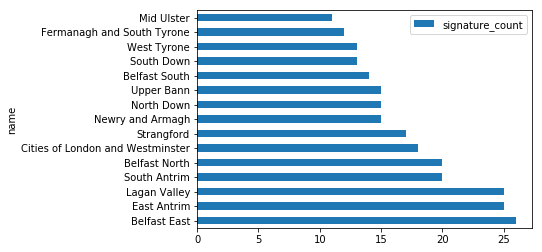

In [409]:
con_df2.sort_values(by = "signature_count", ascending = False).head(15).plot(kind = 'barh')

In [336]:
brexiters.head(10)

,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Leave_pc
Constituency,,,,,
North Antrim,64.9%,18,30,37.8%,62.2%
Strangford,64.5%,18,23,44.5%,55.5%
East Antrim,65.2%,18,22,44.8%,55.2%
Lagan Valley,66.6%,22,25,46.9%,53.1%
Upper Bann,63.6%,24,27,47.4%,52.6%
Belfast East,65.8%,20,21,48.6%,51.4%
South Antrim,63.1%,21,22,49.4%,50.6%
Belfast North,57.5%,20,19,50.4%,49.6%
East Londonderry,59.7%,21,19,52.0%,48.0%


In [130]:
con_df2.signature_count.sum()

# note - there are only 1692 UK signatures to begin with

1665

In [ ]:
# **** SCRAPING RESULTS OF BREXIT VOTE IN NIRE *****

In [178]:
from bs4 import BeautifulSoup as bs
import requests
import re

url = ("https://en.wikipedia.org/wiki/Results_of_the_2016_United_Kingdom_European_Union_membership_referendum#Northern_Ireland")
results = requests.get(url)
print (results)
soup = bs(results.text, 'html.parser')

<Response [200]>


In [150]:
soup

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Results of the 2016 United Kingdom European Union membership referendum - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Results_of_the_2016_United_Kingdom_European_Union_membership_referendum","wgTitle":"Results of the 2016 United Kingdom European Union membership referendum","wgCurRevisionId":879009875,"wgRevisionId":879009875,"wgArticleId":49976215,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Pages with reference errors","Pages with broken reference names","CS1 maint: Archived copy as title","Use dmy dates from October 2016","All articles la

In [151]:
len (soup('table'))

62

In [156]:

nire = soup.find_all("table")[-18]
print (nire)

<table class="wikitable sortable">
<tbody><tr>
<th rowspan="2">Constituency
</th>
<th rowspan="2">Voter turnout,<br/>of eligible
</th>
<th colspan="2">Votes
</th>
<th colspan="2">Proportion of votes
</th></tr>
<tr>
<th>Remain
</th>
<th>Leave
</th>
<th>Remain
</th>
<th>Leave
</th></tr>
<tr style="background:#acf;">
<td><a href="/wiki/Belfast_East_(UK_Parliament_constituency)" title="Belfast East (UK Parliament constituency)">Belfast East</a></td>
<td>65.8%</td>
<td>20,728</td>
<td><b>21,918</b></td>
<td>48.6%</td>
<td><b>51.4%</b>
</td></tr>
<tr style="background:#fea;">
<td><a href="/wiki/Belfast_North_(UK_Parliament_constituency)" title="Belfast North (UK Parliament constituency)">Belfast North</a></td>
<td>57.5%</td>
<td><b>20,128</b></td>
<td>19,844</td>
<td><b>50.4%</b></td>
<td>49.6%
</td></tr>
<tr style="background:#fea;">
<td><a href="/wiki/Belfast_South_(UK_Parliament_constituency)" title="Belfast South (UK Parliament constituency)">Belfast South</a></td>
<td>67.6%</td>
<td><b>

In [175]:
len (nire("tr"))

20

In [176]:
rows = nire.findAll("tr")
rows

[<tr>
 <th rowspan="2">Constituency
 </th>
 <th rowspan="2">Voter turnout,<br/>of eligible
 </th>
 <th colspan="2">Votes
 </th>
 <th colspan="2">Proportion of votes
 </th></tr>, <tr>
 <th>Remain
 </th>
 <th>Leave
 </th>
 <th>Remain
 </th>
 <th>Leave
 </th></tr>, <tr style="background:#acf;">
 <td><a href="/wiki/Belfast_East_(UK_Parliament_constituency)" title="Belfast East (UK Parliament constituency)">Belfast East</a></td>
 <td>65.8%</td>
 <td>20,728</td>
 <td><b>21,918</b></td>
 <td>48.6%</td>
 <td><b>51.4%</b>
 </td></tr>, <tr style="background:#fea;">
 <td><a href="/wiki/Belfast_North_(UK_Parliament_constituency)" title="Belfast North (UK Parliament constituency)">Belfast North</a></td>
 <td>57.5%</td>
 <td><b>20,128</b></td>
 <td>19,844</td>
 <td><b>50.4%</b></td>
 <td>49.6%
 </td></tr>, <tr style="background:#fea;">
 <td><a href="/wiki/Belfast_South_(UK_Parliament_constituency)" title="Belfast South (UK Parliament constituency)">Belfast South</a></td>
 <td>67.6%</td>
 <td><b>30,9

In [278]:
list_rows = []

for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows.append(clean2)

print(clean2)
    
type(clean2)

[West Tyrone, 61.8%, 26,765, 13,274, 66.8%, 33.2%
]


str

In [302]:
ni_df = pd.DataFrame(list_rows)
ni_df.head(3)

,0
0,[]
1,[]
2,"[Belfast East, 65.8%, 20,728, 21,918, 48.6%, 5..."


In [303]:
type (ni_df)

pandas.core.frame.DataFrame

In [304]:
ni_df = pd.DataFrame(list_rows)

In [305]:
nire_df = ni_df[0].str.split(',', expand=True)
nire = pd.DataFrame(nire_df)
nire.head(4)

,0,1,2,3,4,5,6,7
0,[],None,None,None,None,None,None,None
1,[],None,None,None,None,None,None,None
2,[Belfast East,65.8%,20,728,21,918,48.6%,51.4%\n]
3,[Belfast North,57.5%,20,128,19,844,50.4%,49.6%\n]


In [306]:
type (nire)

pandas.core.frame.DataFrame

In [307]:
nire[0] = nire[0].str.strip('[')
nire[7] = nire[7].str.strip(']')
nire[7] = nire[7].str.strip('\n')    

In [308]:
nire.head(4)

,0,1,2,3,4,5,6,7
0,],None,None,None,None,None,None,None
1,],None,None,None,None,None,None,None
2,Belfast East,65.8%,20,728,21,918,48.6%,51.4%
3,Belfast North,57.5%,20,128,19,844,50.4%,49.6%


In [309]:
nire.drop(nire.index[0: 2], inplace=True)
nire

,0,1,2,3,4,5,6,7
2,Belfast East,65.8%,20,728,21,918,48.6%,51.4%
3,Belfast North,57.5%,20,128,19,844,50.4%,49.6%
4,Belfast South,67.6%,30,960,13,596,69.5%,30.5%
5,Belfast West,48.9%,23,099,8,092,74.1%,25.9%
6,East Antrim,65.2%,18,616,22,929,44.8%,55.2%
7,East Londonderry,59.7%,21,098,19,455,52.0%,48.0%
8,Fermanagh and South Tyrone,67.8%,28,200,19,958,58.6%,41.4%
9,Foyle,57.4%,32,064,8,905,78.3%,21.7%
10,Lagan Valley,66.6%,22,710,25,704,46.9%,53.1%
11,Mid Ulster,61.6%,25,612,16,799,60.4%,39.6%


In [310]:
nire.columns = ["Constituency", "Voter_turnout", "Votes_remain_inK", "x", "Votes_leave_inK", "y", "Remain_pc", "Leave_pc"]


In [311]:
# DROP multiple columns
nire.drop(['x', 'y'], axis=1, inplace=True)


In [312]:
nire.head(4)

,Constituency,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Leave_pc
2,Belfast East,65.8%,20,21,48.6%,51.4%
3,Belfast North,57.5%,20,19,50.4%,49.6%
4,Belfast South,67.6%,30,13,69.5%,30.5%
5,Belfast West,48.9%,23,8,74.1%,25.9%


In [313]:
nire.set_index("Constituency",drop=True,inplace=True)


In [314]:
nire.head(4)

,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Leave_pc
Constituency,,,,,
Belfast East,65.8%,20,21,48.6%,51.4%
Belfast North,57.5%,20,19,50.4%,49.6%
Belfast South,67.6%,30,13,69.5%,30.5%
Belfast West,48.9%,23,8,74.1%,25.9%


In [315]:
nire.dtypes

Voter_turnout       object
Votes_remain_inK    object
Votes_leave_inK     object
Remain_pc           object
Leave_pc            object
dtype: object

In [317]:
# changing the 'integers' into real integers

nire.Votes_remain_inK = nire.Votes_remain_inK.astype(int)
nire.Votes_leave_inK = nire.Votes_leave_inK.astype(int)


In [318]:
nire.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Belfast East to West Tyrone
Data columns (total 5 columns):
Voter_turnout       18 non-null object
Votes_remain_inK    18 non-null int64
Votes_leave_inK     18 non-null int64
Remain_pc           18 non-null object
Leave_pc            18 non-null object
dtypes: int64(2), object(3)
memory usage: 864.0+ bytes


In [331]:
nire

,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Leave_pc
Constituency,,,,,
Belfast East,65.8%,20,21,48.6%,51.4%
Belfast North,57.5%,20,19,50.4%,49.6%
Belfast South,67.6%,30,13,69.5%,30.5%
Belfast West,48.9%,23,8,74.1%,25.9%
East Antrim,65.2%,18,22,44.8%,55.2%
East Londonderry,59.7%,21,19,52.0%,48.0%
Fermanagh and South Tyrone,67.8%,28,19,58.6%,41.4%
Foyle,57.4%,32,8,78.3%,21.7%
Lagan Valley,66.6%,22,25,46.9%,53.1%


In [334]:
brexiters = nire.sort_values(by = "Leave_pc", ascending = False)
brexiters

,Voter_turnout,Votes_remain_inK,Votes_leave_inK,Remain_pc,Leave_pc
Constituency,,,,,
North Antrim,64.9%,18,30,37.8%,62.2%
Strangford,64.5%,18,23,44.5%,55.5%
East Antrim,65.2%,18,22,44.8%,55.2%
Lagan Valley,66.6%,22,25,46.9%,53.1%
Upper Bann,63.6%,24,27,47.4%,52.6%
Belfast East,65.8%,20,21,48.6%,51.4%
South Antrim,63.1%,21,22,49.4%,50.6%
Belfast North,57.5%,20,19,50.4%,49.6%
East Londonderry,59.7%,21,19,52.0%,48.0%


In [ ]:
(['Belfast East',
       'East Antrim',  'Lagan Valley', 'Mid Ulster', 'Newry and Armagh',
       'North Antrim', 'North Down', 'South Antrim', 'South Down',
       'Strangford', 'Upper Bann', 'West Tyrone'],
      dtype='object', name='Constituency')

In [327]:
leave = nire.Votes_leave_inK
remain = nire.Votes_remain_inK

In [ ]:
leave = nire.Votes_leave_inK
remain = nire.Votes_remain_inK

def filter
    if leave > remain:
        print ("Voted leave")
    else:
        print ("Voted remain")
